In [1]:
#importing libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy.stats import probplot
import statsmodels.formula.api as smf 
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")


In [2]:
#importing data
data = pd.read_csv("C:/Users/dell/Documents/DS_Assignments/5_MLR/ToyotaCorolla.csv", encoding='latin1')

In [3]:
data.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [4]:
dataset=data[["Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight","Price"]]
dataset.head()

,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight,Price
0,23,46986,90,2000,3,5,210,1165,13500
1,23,72937,90,2000,3,5,210,1165,13750
2,24,41711,90,2000,3,5,210,1165,13950
3,26,48000,90,2000,3,5,210,1165,14950
4,30,38500,90,2000,3,5,210,1170,13750


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Age_08_04      1436 non-null   int64
 1   KM             1436 non-null   int64
 2   HP             1436 non-null   int64
 3   cc             1436 non-null   int64
 4   Doors          1436 non-null   int64
 5   Gears          1436 non-null   int64
 6   Quarterly_Tax  1436 non-null   int64
 7   Weight         1436 non-null   int64
 8   Price          1436 non-null   int64
dtypes: int64(9)
memory usage: 101.1 KB


In [6]:
dataset.dtypes

Age_08_04        int64
KM               int64
HP               int64
cc               int64
Doors            int64
Gears            int64
Quarterly_Tax    int64
Weight           int64
Price            int64
dtype: object

In [7]:
dataset.describe()

,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight,Price
count,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000
mean,55.947075,68533.259749,101.502089,1576.85585,4.033426,5.026462,87.122563,1072.45961,10730.824513
std,18.599988,37506.448872,14.981080,424.38677,0.952677,0.188510,41.128611,52.64112,3626.964585
min,1.000000,1.000000,69.000000,1300.00000,2.000000,3.000000,19.000000,1000.00000,4350.000000
25%,44.000000,43000.000000,90.000000,1400.00000,3.000000,5.000000,69.000000,1040.00000,8450.000000
50%,61.000000,63389.500000,110.000000,1600.00000,4.000000,5.000000,85.000000,1070.00000,9900.000000
75%,70.000000,87020.750000,110.000000,1600.00000,5.000000,5.000000,85.000000,1085.00000,11950.000000
max,80.000000,243000.000000,192.000000,16000.00000,5.000000,6.000000,283.000000,1615.00000,32500.000000


Text(0.5, 1.0, "Q-Q plot of 'KM'")

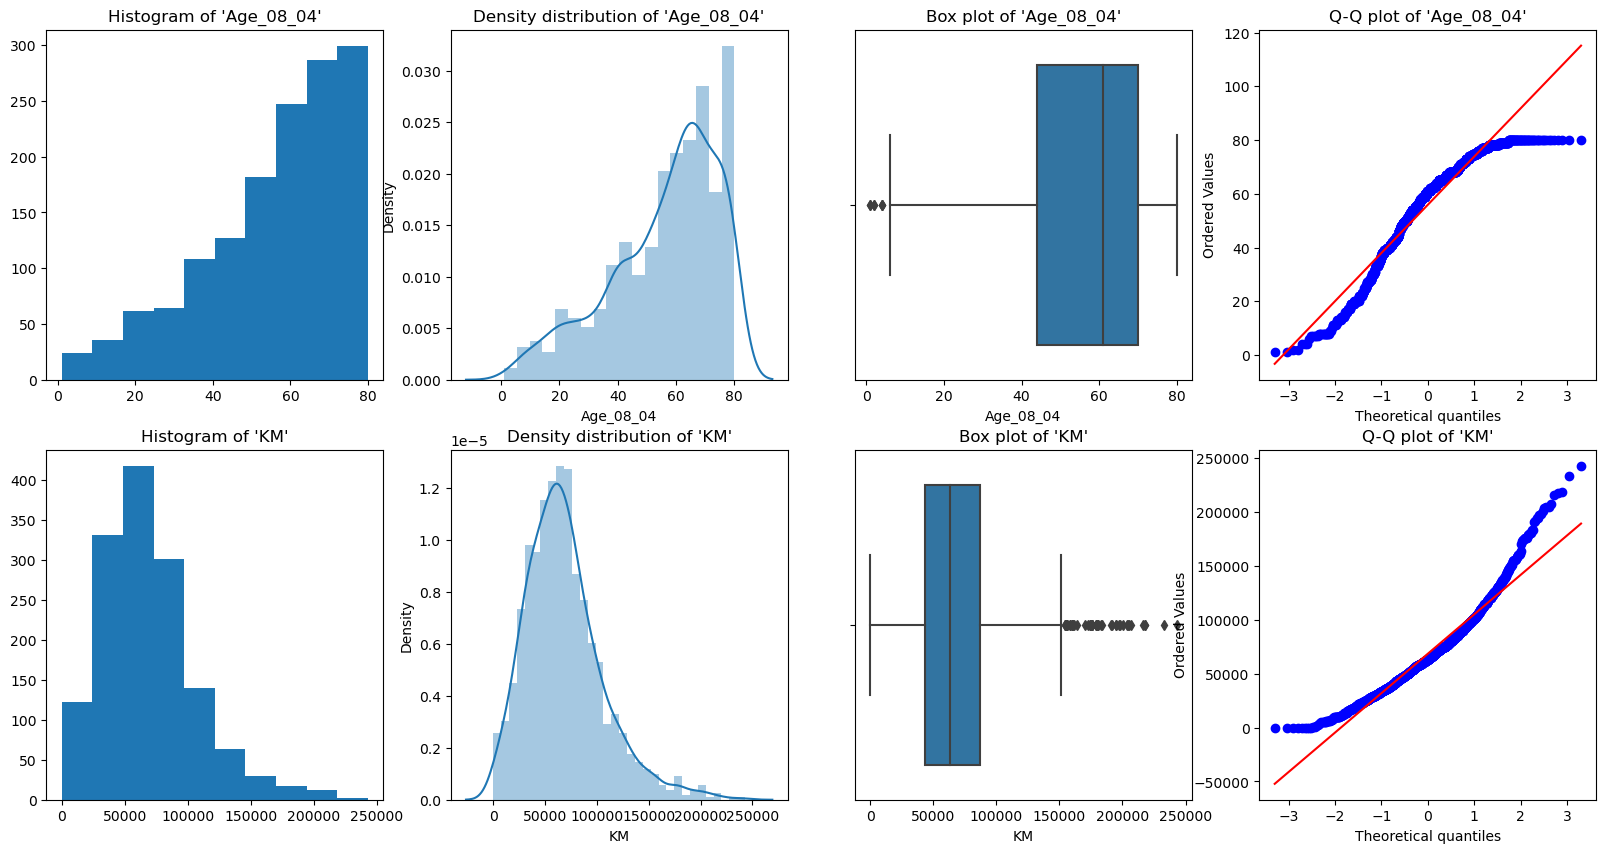

In [8]:
# Histogram
plt.figure(figsize=(20,10))
plt.subplot(2,4,1)
plt.hist(dataset['Age_08_04'], density=False)
plt.title("Histogram of 'Age_08_04'")
plt.subplot(2,4,5)
plt.hist(dataset['KM'], density=False)
plt.title("Histogram of 'KM'")

# Density plot
plt.subplot(2,4,2)
sns.distplot(dataset['Age_08_04'], kde=True)
plt.title("Density distribution of 'Age_08_04'")
plt.subplot(2,4,6)
sns.distplot(dataset['KM'], kde=True)
plt.title("Density distribution of 'KM'")


# box plot
plt.subplot(2,4,3)
sns.boxplot(dataset['Age_08_04'])
plt.title("Box plot of 'Age_08_04'")
plt.subplot(2,4,7)
sns.boxplot(dataset['KM'])
plt.title("Box plot of 'KM'")

# Normal Q-Q plot
plt.subplot(2,4,4)
probplot(dataset['Age_08_04'], plot=plt)
plt.title("Q-Q plot of 'Age_08_04'")
plt.subplot(2,4,8)
probplot(dataset['KM'], plot=plt)
plt.title("Q-Q plot of 'KM'")

Text(0.5, 1.0, "Q-Q plot of 'cc'")

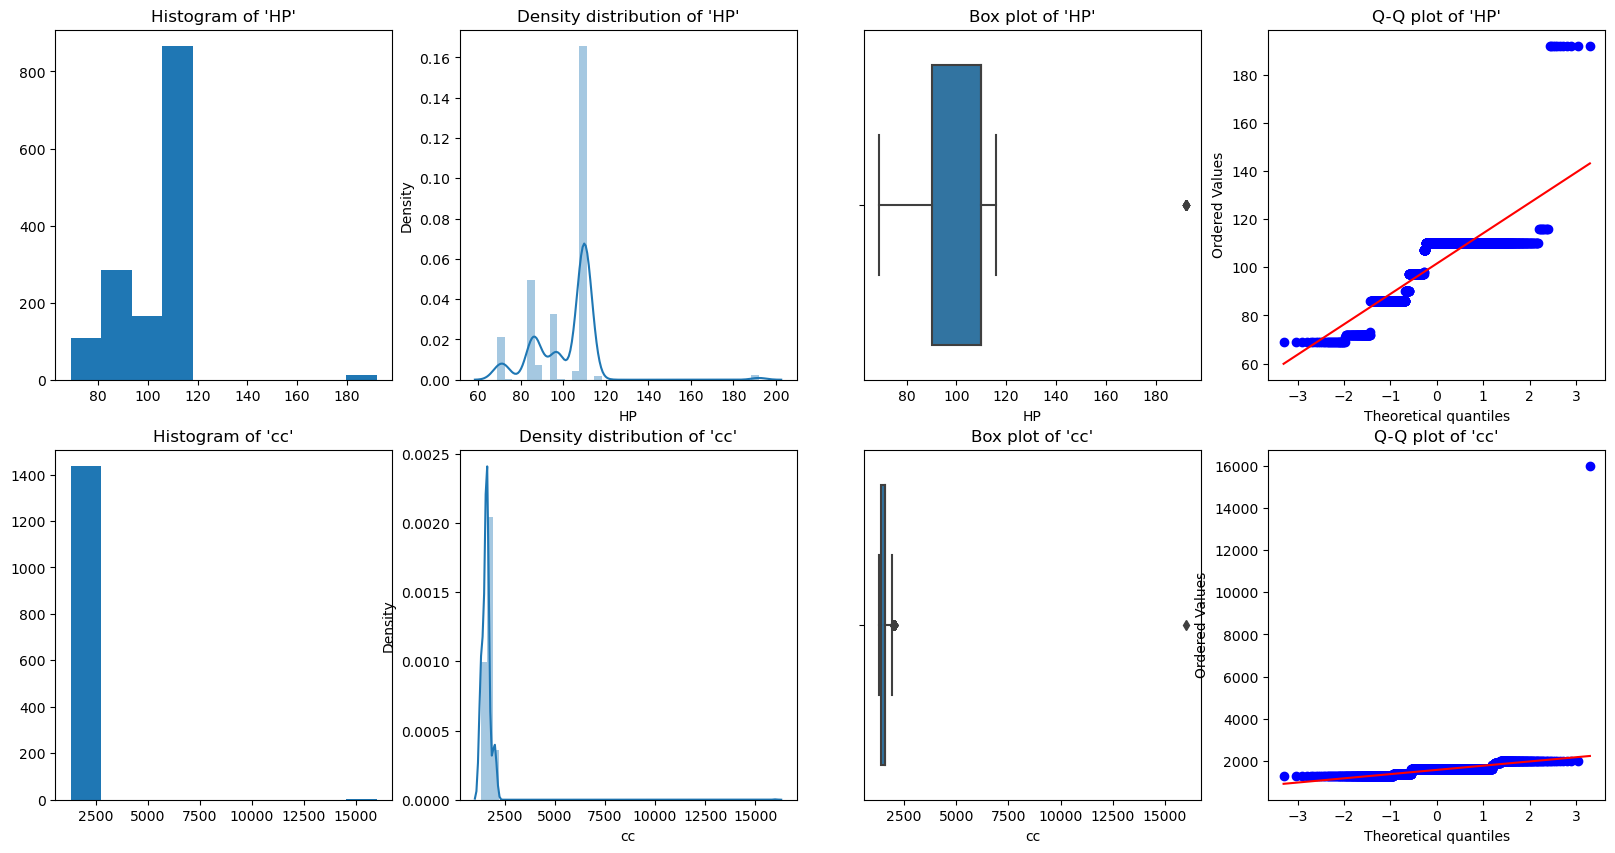

In [9]:
# Histogram
plt.figure(figsize=(20,10))
plt.subplot(2,4,1)
plt.hist(dataset['HP'], density=False)
plt.title("Histogram of 'HP'")
plt.subplot(2,4,5)
plt.hist(dataset['cc'], density=False)
plt.title("Histogram of 'cc'")

# Density plot
plt.subplot(2,4,2)
sns.distplot(dataset['HP'], kde=True)
plt.title("Density distribution of 'HP'")
plt.subplot(2,4,6)
sns.distplot(dataset['cc'], kde=True)
plt.title("Density distribution of 'cc'")


# box plot
plt.subplot(2,4,3)
sns.boxplot(dataset['HP'])
plt.title("Box plot of 'HP'")
plt.subplot(2,4,7)
sns.boxplot(dataset['cc'])
plt.title("Box plot of 'cc'")

# Normal Q-Q plot
plt.subplot(2,4,4)
probplot(dataset['HP'], plot=plt)
plt.title("Q-Q plot of 'HP'")
plt.subplot(2,4,8)
probplot(dataset['cc'], plot=plt)
plt.title("Q-Q plot of 'cc'")

Text(0.5, 1.0, "Q-Q plot of 'Gears'")

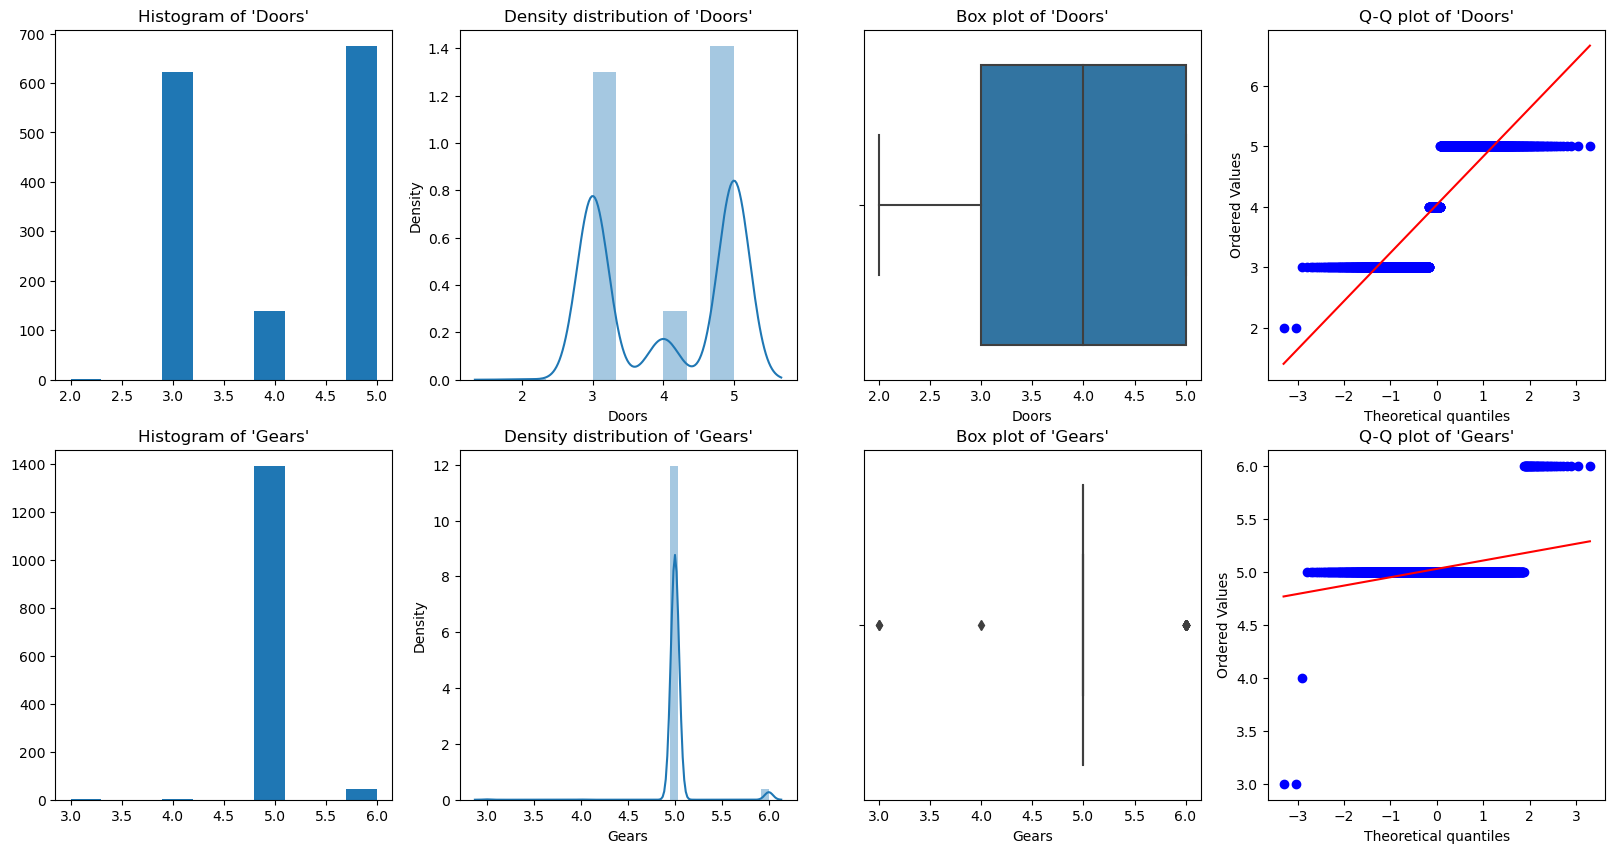

In [10]:
# Histogram
plt.figure(figsize=(20,10))
plt.subplot(2,4,1)
plt.hist(dataset['Doors'], density=False)
plt.title("Histogram of 'Doors'")
plt.subplot(2,4,5)
plt.hist(dataset['Gears'], density=False)
plt.title("Histogram of 'Gears'")

# Density plot
plt.subplot(2,4,2)
sns.distplot(dataset['Doors'], kde=True)
plt.title("Density distribution of 'Doors'")
plt.subplot(2,4,6)
sns.distplot(dataset['Gears'], kde=True)
plt.title("Density distribution of 'Gears'")


# box plot
plt.subplot(2,4,3)
sns.boxplot(dataset['Doors'])
plt.title("Box plot of 'Doors'")
plt.subplot(2,4,7)
sns.boxplot(dataset['Gears'])
plt.title("Box plot of 'Gears'")

# Normal Q-Q plot
plt.subplot(2,4,4)
probplot(dataset['Doors'], plot=plt)
plt.title("Q-Q plot of 'Doors'")
plt.subplot(2,4,8)
probplot(dataset['Gears'], plot=plt)
plt.title("Q-Q plot of 'Gears'")

Text(0.5, 1.0, "Q-Q plot of 'Weight'")

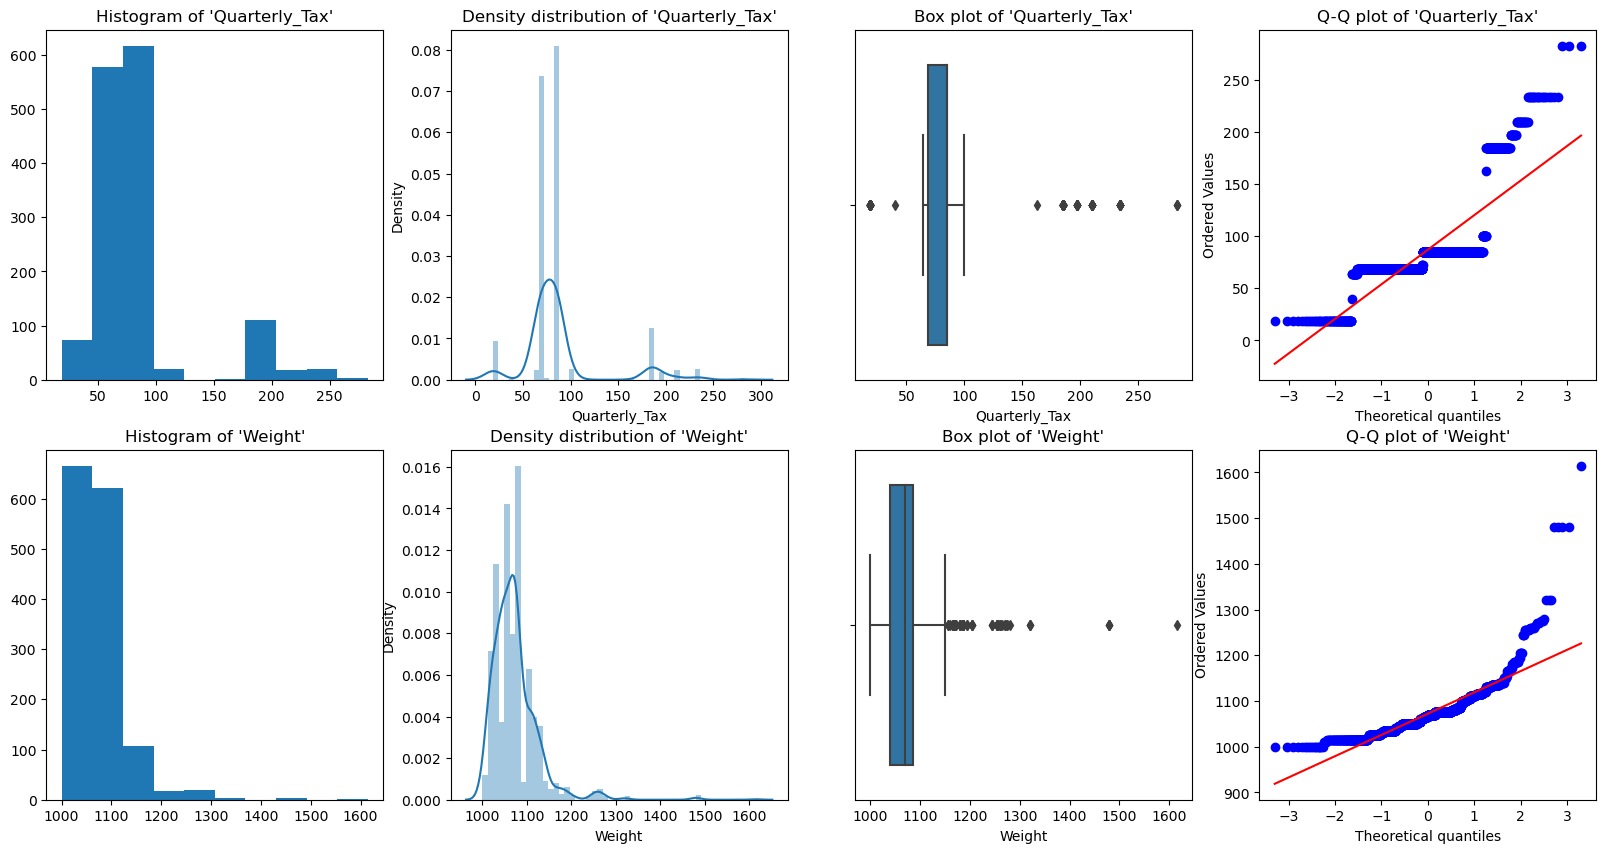

In [11]:
# Histogram
plt.figure(figsize=(20,10))
plt.subplot(2,4,1)
plt.hist(dataset['Quarterly_Tax'], density=False)
plt.title("Histogram of 'Quarterly_Tax'")
plt.subplot(2,4,5)
plt.hist(dataset['Weight'], density=False)
plt.title("Histogram of 'Weight'")

# Density plot
plt.subplot(2,4,2)
sns.distplot(dataset['Quarterly_Tax'], kde=True)
plt.title("Density distribution of 'Quarterly_Tax'")
plt.subplot(2,4,6)
sns.distplot(dataset['Weight'], kde=True)
plt.title("Density distribution of 'Weight'")


# box plot
plt.subplot(2,4,3)
sns.boxplot(dataset['Quarterly_Tax'])
plt.title("Box plot of 'Quarterly_Tax'")
plt.subplot(2,4,7)
sns.boxplot(dataset['Weight'])
plt.title("Box plot of 'Weight'")

# Normal Q-Q plot
plt.subplot(2,4,4)
probplot(dataset['Quarterly_Tax'], plot=plt)
plt.title("Q-Q plot of 'Quarterly_Tax'")
plt.subplot(2,4,8)
probplot(dataset['Weight'], plot=plt)
plt.title("Q-Q plot of 'Weight'")

Text(0.5, 1.0, "Q-Q plot of 'Price'")

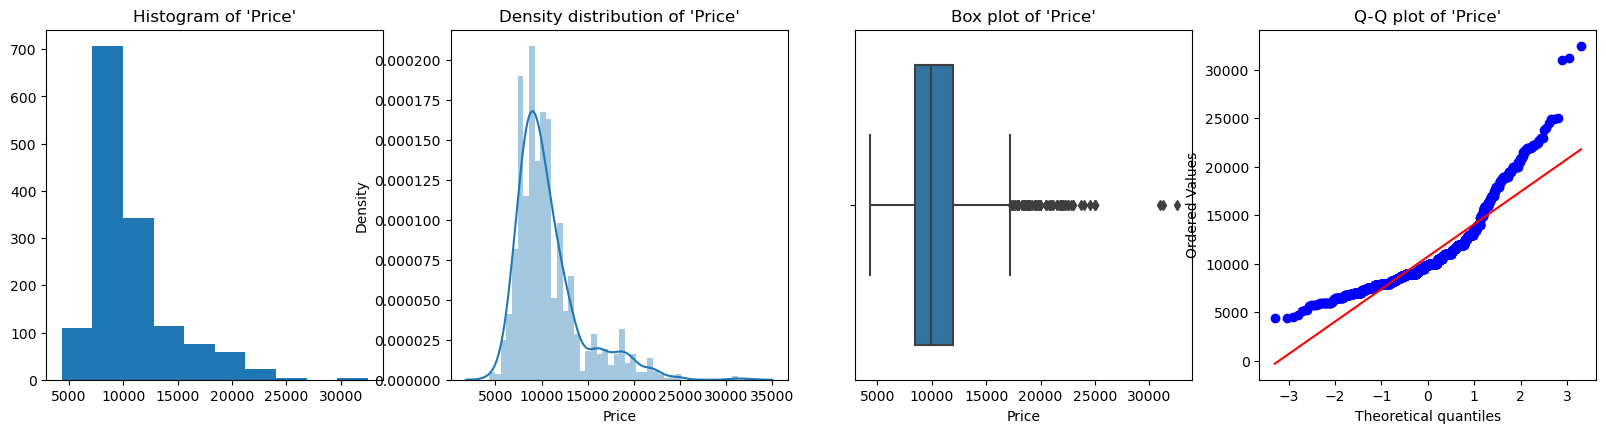

In [12]:
# Histogram
plt.figure(figsize=(20,10))
plt.subplot(2,4,1)
plt.hist(dataset['Price'], density=False)
plt.title("Histogram of 'Price'")

# Density plot
plt.subplot(2,4,2)
sns.distplot(dataset['Price'], kde=True)
plt.title("Density distribution of 'Price'")

# box plot
plt.subplot(2,4,3)
sns.boxplot(dataset['Price'])
plt.title("Box plot of 'Price'")

# Normal Q-Q plot
plt.subplot(2,4,4)
probplot(dataset['Price'], plot=plt)
plt.title("Q-Q plot of 'Price'")

## There are many outliers in the given dataset

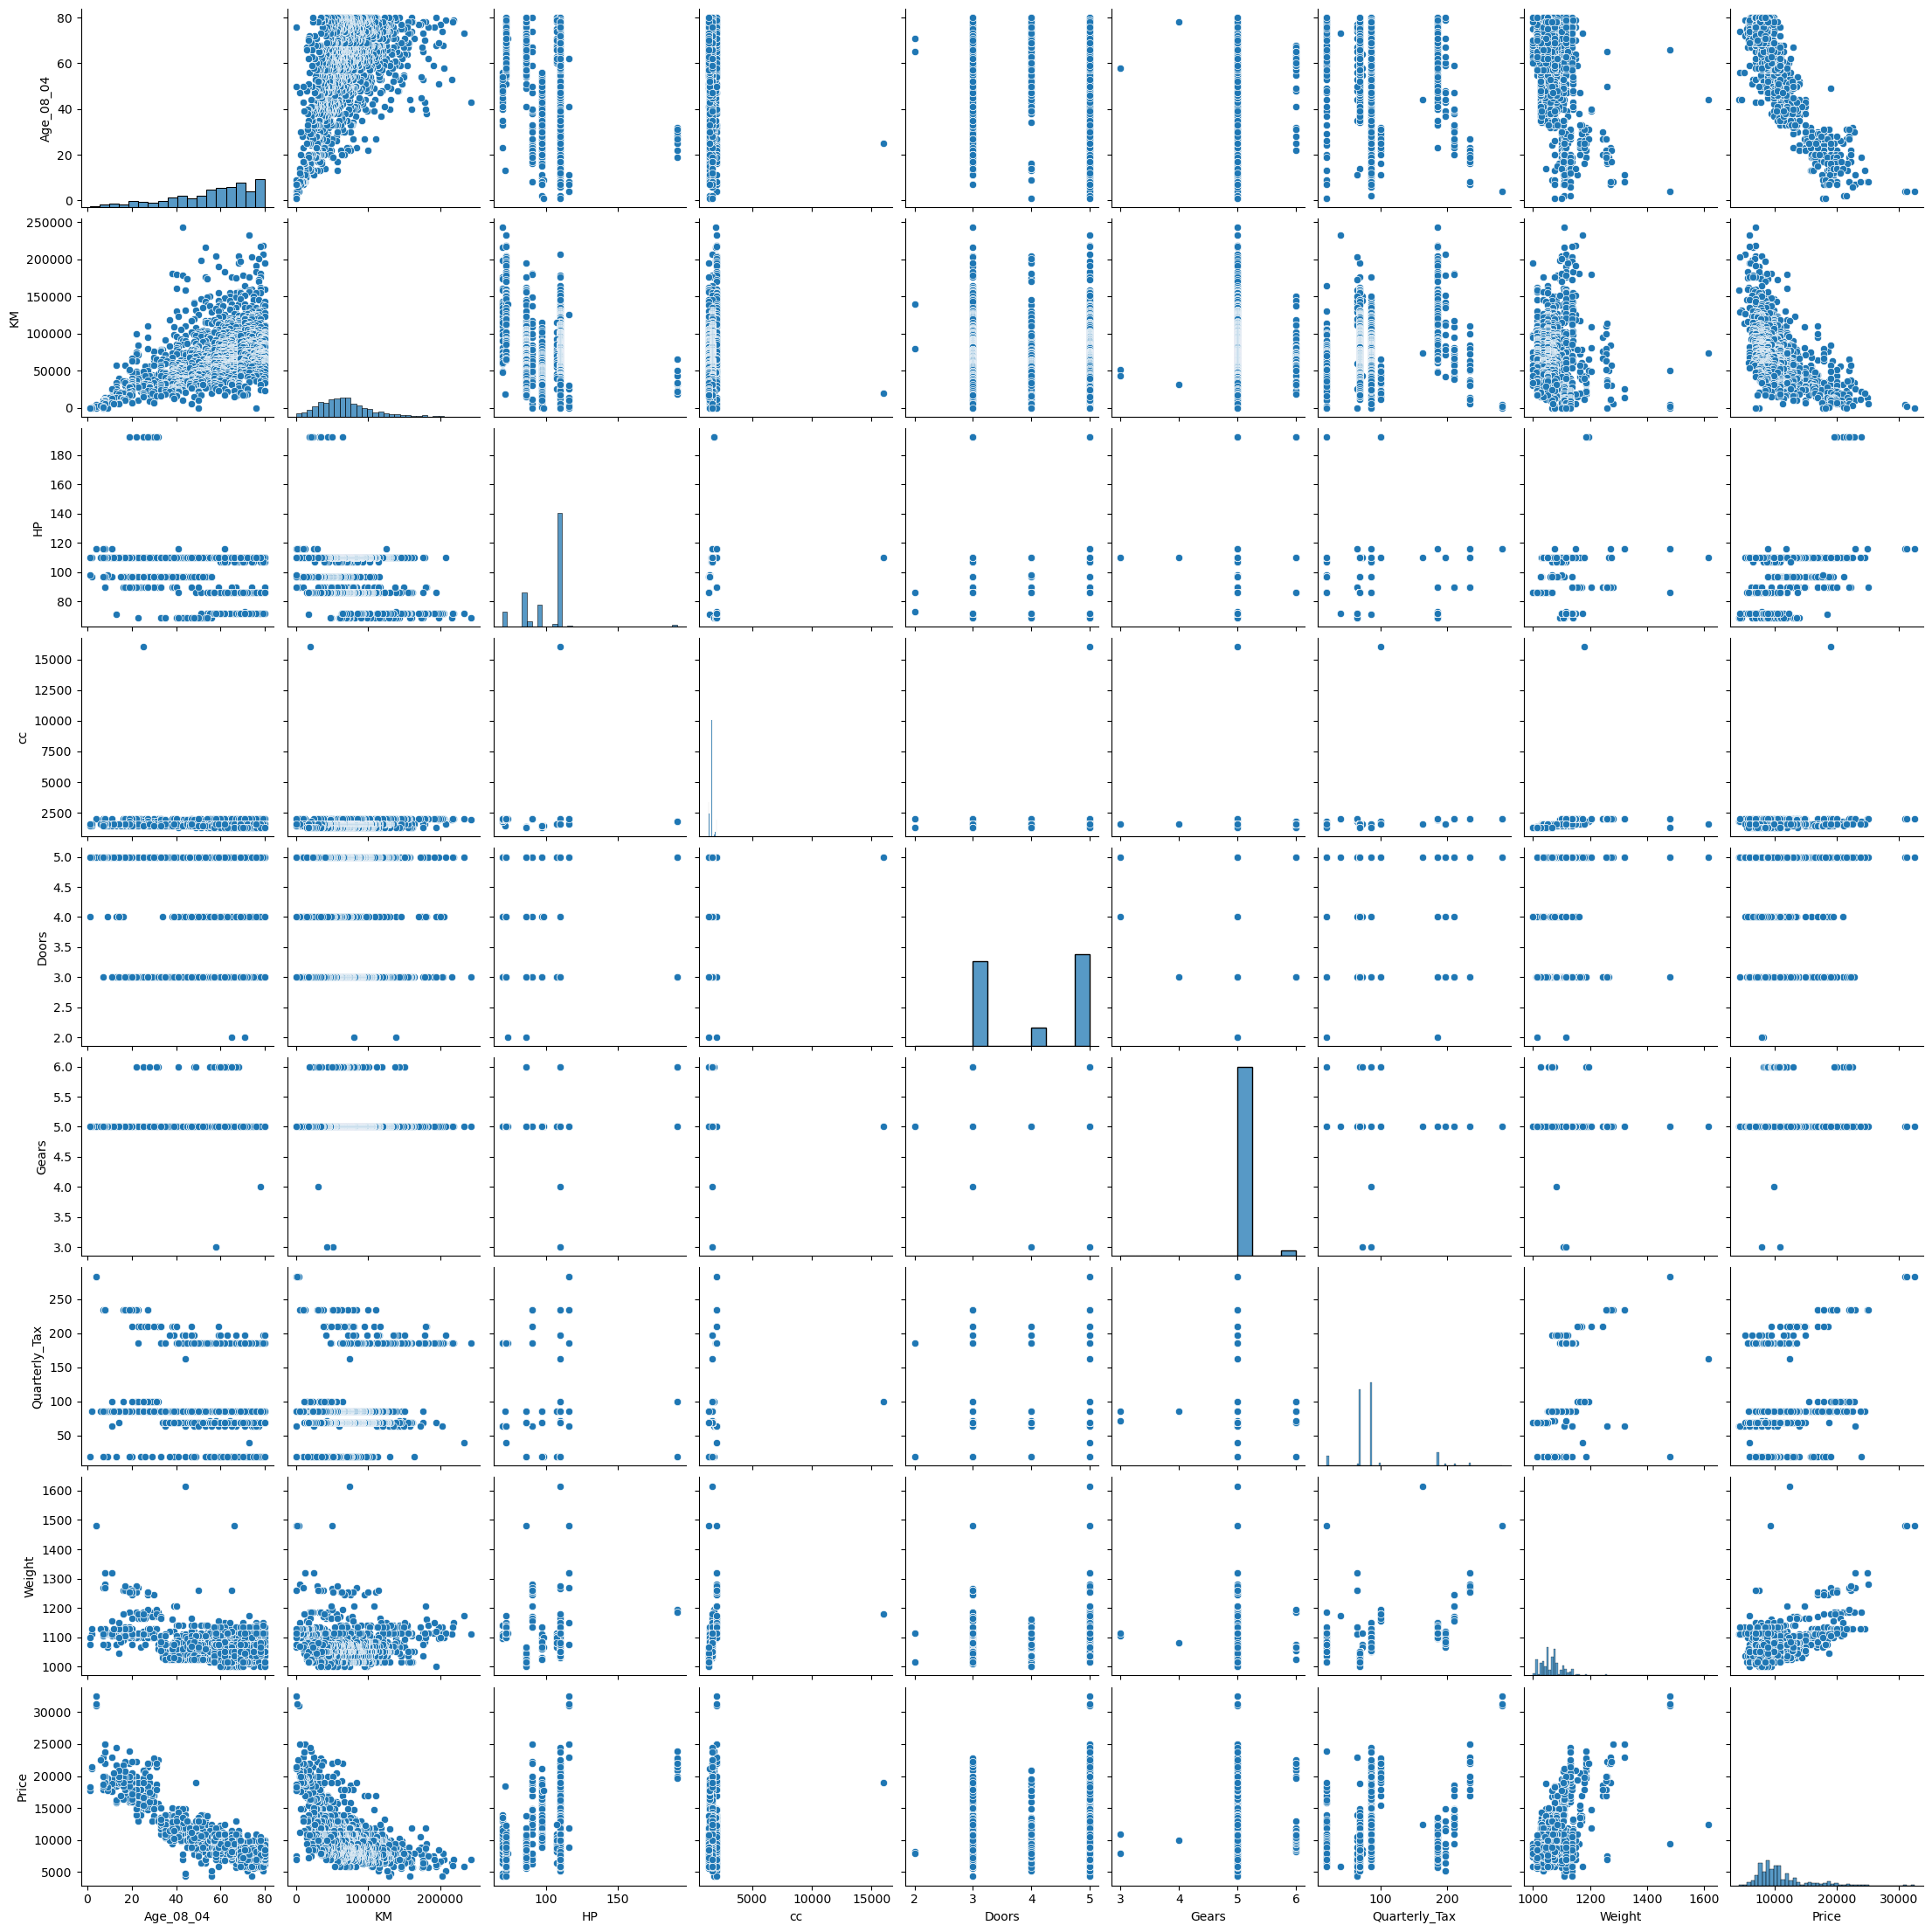

In [13]:
sns.pairplot(dataset)

In [14]:
## correlation
print("Correlation between variables: ")
dataset.corr()


Correlation between variables: 


,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight,Price
Age_08_04,1.000000,0.505672,-0.156622,-0.098084,-0.148359,-0.005364,-0.198431,-0.470253,-0.876590
KM,0.505672,1.000000,-0.333538,0.102683,-0.036197,0.015023,0.278165,-0.028598,-0.569960
HP,-0.156622,-0.333538,1.000000,0.035856,0.092424,0.209477,-0.298432,0.089614,0.314990
cc,-0.098084,0.102683,0.035856,1.000000,0.079903,0.014629,0.306996,0.335637,0.126389
Doors,-0.148359,-0.036197,0.092424,0.079903,1.000000,-0.160141,0.109363,0.302618,0.185326
Gears,-0.005364,0.015023,0.209477,0.014629,-0.160141,1.000000,-0.005452,0.020613,0.063104
Quarterly_Tax,-0.198431,0.278165,-0.298432,0.306996,0.109363,-0.005452,1.000000,0.626134,0.219197
Weight,-0.470253,-0.028598,0.089614,0.335637,0.302618,0.020613,0.626134,1.000000,0.581198
Price,-0.876590,-0.569960,0.314990,0.126389,0.185326,0.063104,0.219197,0.581198,1.000000


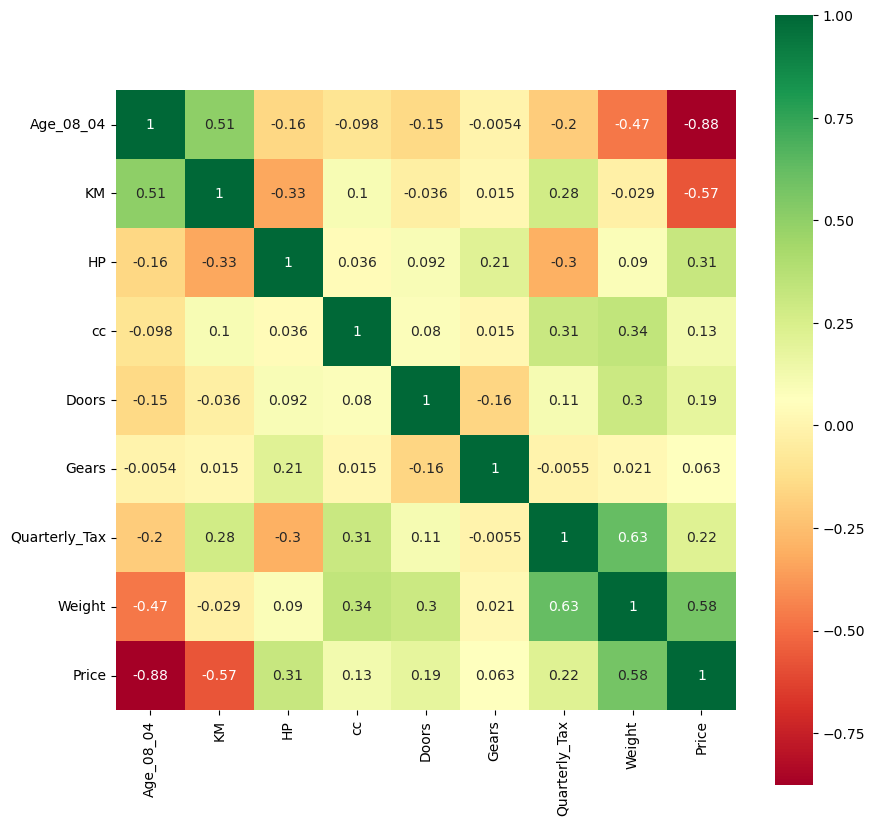

In [15]:
# Plotting the heatmap
plt.figure(figsize=(10,10)) 
sns.heatmap(dataset.corr(), annot=True,cmap='RdYlGn',square=True)  
plt.show()

In [16]:
#data transformation
dataset_log = np.log(dataset)#log transformation

dataset_sqr = np.square(dataset)#square transformation

dataset_sqrt = np.sqrt(dataset)#square root transformation

dataset_cbrt = np.cbrt(dataset)#cube root transformaton

dataset_exp = np.exp(dataset)#exponential transformation

dataset_wgt_grs=data[["Age_08_04","KM","HP","cc","Doors","Quarterly_Tax","Price"]]

dataset_wgt_grs_hp=data[["Age_08_04","KM","cc","Doors","Quarterly_Tax","Price"]]



In [17]:
def linearity(y_test,y_pred):
    
    ## 1))Assumption 1: Linearity check
    ##Checking with a scatter plot of actual vs. predicted-->Predictions should follow the diagonal line

    plt.subplots(figsize=(4, 2))
    plt.scatter(x=y_test, y=y_pred, alpha=0.5)

    # Plotting the diagonal line
    line_coords = np.arange(y_test.min().min(), y_pred.max().max())
    plt.plot(line_coords, line_coords,  
             color='darkorange', linestyle='--')
    plt.title('Actual vs. Predicted')
    plt.show()


In [18]:
def normality(residuals):
    mean_residuals = np.mean(residuals)
    print("Mean of Residuals {}".format(mean_residuals))
    
    ## 2))Assumption 2: Normality of residuals or errors
    from statsmodels.stats.diagnostic import normal_ad
    # the Anderson-Darling test
    # p-value from the test - below 0.05 generally means non-normal

    p_value = normal_ad(residuals)[1]
    print("p_value for normality", p_value)
    if p_value < 0.05:
        print('Residuals are not normally distributed and assumption not satisfied')
    else:
        print('Residuals are normally distributed and hence Assumption satisfied')

    # Plotting the residuals distribution
    plt.subplots(figsize=(4, 2))
    plt.title('Distribution of Residuals')
    sns.histplot(residuals)
    plt.show()
    


In [19]:
def autocorrelation(residuals):
    ## 3))Assumption 3: Autocorrelation check
    from statsmodels.stats.stattools import durbin_watson

    # Performing Durbin-Watson Test
    # Values of 1.5 < d < 2.5 generally show that there is no autocorrelation in the data
    # 0 to 2< is positive autocorrelation
    # >2 to 4 is negative autocorrelation

    durbinWatson = durbin_watson(residuals)
    print('Durbin-Watson:', durbinWatson)
    if durbinWatson < 1.5:
        print('Signs of positive autocorrelation and hence Assumption not satisfied')
    elif durbinWatson > 2.5:
        print('Signs of negative autocorrelation and hence Assumption not satisfied')
    else:
        print('Little to no autocorrelation and hence Assumption satisfied')



In [20]:
def homoscedasticity(y_test,y_pred,residuals):

    ## 4))Assumption 4: Check for Homoscedasticity
    #bartlett test
    from scipy.stats import bartlett
    test = bartlett( y_test,residuals)[1]
    print("p_value: ",test)
    if test<0.05:
        print('Error terms are not homoscedastic and hence Assumption not satisfied')
    else:
        print('Error terms are homoscedastic and hence Assumption satisfied')

    plt.subplots(figsize=(6, 4))
    plt.scatter(x=y_pred, y=residuals, alpha=0.5)
    plt.plot(np.repeat(0,175000), color='darkorange', linestyle='--')
    plt.xlabel('y_pred/predicted values')
    plt.ylabel('Residuals')
    plt.title('Residuals vs fitted values plot for homoscedasticity check')
    plt.show()  
    


In [21]:
def Multicollinearity(dataset):  
    # 5))Assumption 5: Little to no multicollinearity among predictors
    dataset_X=dataset.drop(['Price'],axis=1)
    dataset_X.head()

    from statsmodels.stats.outliers_influence import variance_inflation_factor
    # Plotting the heatmap
#     plt.figure(figsize=(5,5)) 
#     sns.heatmap(dataset.corr(), annot=True,cmap='RdYlGn',square=True)  
#     plt.show()

    # Variance Inflation Factors (VIF)
    # > 10: An indication that multicollinearity may be present
    # > 100: Certain multicollinearity among the variables
    # print(dataset_X)

    # Gathering the VIF for each variable
    VIF = [variance_inflation_factor(dataset_X.values, i) for i in range(dataset_X.shape[1])]
    for idx, vif in enumerate(VIF):
        print('{0}: {1}'.format(dataset_X.columns[idx], vif))

    # Gathering and printing total cases of possible or definite multicollinearity
    possible_multicollinearity = sum([1 for vif in VIF if vif > 10])
    definite_multicollinearity = sum([1 for vif in VIF if vif > 100])
    print()
    print('{0} cases of possible multicollinearity'.format(possible_multicollinearity))
    print('{0} cases of definite multicollinearity'.format(definite_multicollinearity))
    print()

    if definite_multicollinearity == 0:
        if possible_multicollinearity == 0:
            print('Little or no multicollinearity among predictors , hence Assumption satisfied')
        else:
            print('Assumption possibly satisfied, hence Consider removing variables with a high Variance Inflation Factor (VIF)')

    else:
        print('Assumption not satisfied, hence Consider removing variables with a high Variance Inflation Factor (VIF)')
        


In [22]:
def model(dataset):
    
    X = dataset.iloc[:,:-1].values # independant variables
    y = dataset.iloc[:,-1].values ## dependant variable  
    
    #train test data split
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.3, random_state=0)
    from sklearn.linear_model import LinearRegression
    reg=LinearRegression()
    reg.fit(X_train,y_train)
    y_pred=reg.predict(X_test)
    from sklearn.metrics import mean_absolute_error,mean_squared_error, mean_absolute_percentage_error, r2_score

    mae = mean_absolute_error(y_true=y_test,y_pred=y_pred)
    #squared True returns MSE value, False returns RMSE value.
    mse = mean_squared_error(y_true=y_test,y_pred=y_pred) #default=True
    rmse = mean_squared_error(y_true=y_test,y_pred=y_pred,squared=False)
    mape = mean_absolute_percentage_error(y_true=y_test,y_pred=y_pred)
    rsquare = r2_score(y_true=y_test, y_pred=y_pred)

    print("MAE:",mae)
    print("MSE:",mse)
    print("RMSE:",rmse)
    print("MAPE:",mape)
    print("Rsquare:", rsquare)
    
    residuals = y_test-y_pred
    
    linearity(y_test,y_pred)
    normality(residuals)
    autocorrelation(residuals)
    homoscedasticity(y_test,y_pred,residuals)
    Multicollinearity(dataset)
    
# model(dataset)


In [23]:
def smf_ols(dataset):
    
    x = dataset.iloc[:,:-1] # independent variables
    y = dataset.iloc[:,-1] # dependent varible
    #print(X)
    model = smf.ols('Price~Age_08_04+HP+cc+Doors+Gears+Quarterly_Tax+Weight', data=dataset).fit()
    print(model.summary())
    fig = sm.graphics.influence_plot(model, criterion="cooks")
    fig.tight_layout(pad=1.0)
    lm_cooksd = model.get_influence().cooks_distance[0]

    # get length of df to obtain n
    n = len(dataset["Price"])

    # calculate critical d
    critical_d = 4/n
    print('\n\nCritical Cooks distance:', critical_d)

    # identification of potential outliers with leverage
    out_d = lm_cooksd > critical_d

    # output potential outliers with leverage
    print(dataset.index[out_d], "\n", 
        lm_cooksd[out_d])
    
    subset = ~dataset.index.isin(dataset.index[out_d])

    print(dataset.index, "\n", subset)
    
    lm2 = smf.ols('Price~Age_08_04+HP+cc+Doors+Gears+Quarterly_Tax+Weight', data=dataset, subset=subset).fit()

    print(lm2.summary())
# smf_ols(dataset)

In [35]:
def smf_ols_wgt_grs(dataset):
    
    x = dataset.iloc[:,:-1] # independent variables
    y = dataset.iloc[:,-1] # dependent varible
    #print(X)
    model = smf.ols('Price~Age_08_04+HP+cc+Doors+Quarterly_Tax', data=dataset).fit()
    print(model.summary())
    fig = sm.graphics.influence_plot(model, criterion="cooks")
    fig.tight_layout(pad=1.0)
    
    model_cooksd = model.get_influence().cooks_distance[0]

    # get length of df to obtain n
    n = len(dataset["Price"])

    # calculate critical d
    critical_d = 4/n
    print('\n\nCritical Cooks distance:', critical_d)

    # identification of potential outliers with leverage
    out_d = model_cooksd > critical_d

    # output potential outliers with leverage
    print(dataset.index[out_d], "\n", 
        model_cooksd[out_d])
    
    subset = ~dataset.index.isin(dataset.index[out_d])

    print(dataset.index, "\n", subset)
    
    model_cook = smf.ols('Price~Age_08_04+HP+cc+Doors+Quarterly_Tax', data=dataset, subset=subset).fit()

    print(model_cook.summary())

Model without transformation
MAE: 1053.1383762508967
MSE: 3895254.244012713
RMSE: 1973.6398465811114
MAPE: 0.10563519848084109
Rsquare: 0.6550065853643883


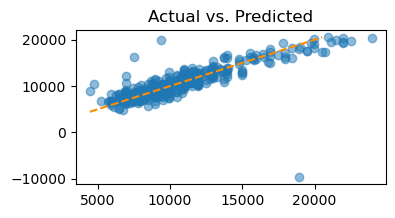

Mean of Residuals 5.034533544553
p_value for normality 0.0
Residuals are not normally distributed and assumption not satisfied


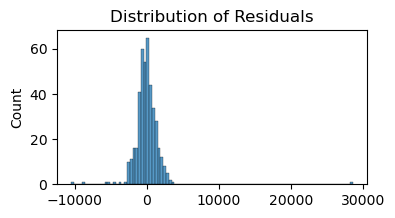

Durbin-Watson: 2.009768790890584
Little to no autocorrelation and hence Assumption satisfied
p_value:  4.14150721777905e-27
Error terms are not homoscedastic and hence Assumption not satisfied


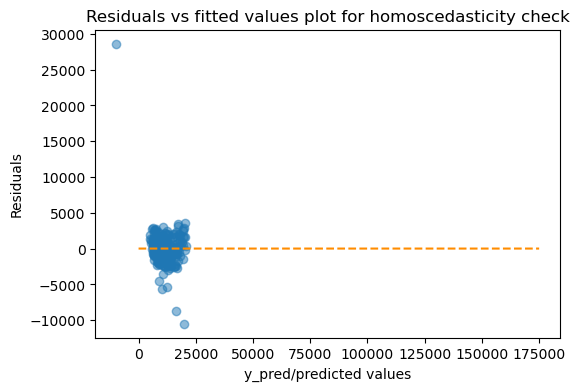

Age_08_04: 16.392683588571295
KM: 7.590522393363038
HP: 64.89496020816397
cc: 17.19974980505927
Doors: 21.874692138630017
Gears: 438.6318041941506
Quarterly_Tax: 11.020073549837228
Weight: 543.1330758695781

7 cases of possible multicollinearity
2 cases of definite multicollinearity

Assumption not satisfied, hence Consider removing variables with a high Variance Inflation Factor (VIF)


In [36]:
print("Model without transformation")
model(dataset)     

Square root transformed model
MAE: 4.78972092564382
MSE: 46.70981871017155
RMSE: 6.834458187023427
MAPE: 0.04826977908990492
Rsquare: 0.8011532109979715


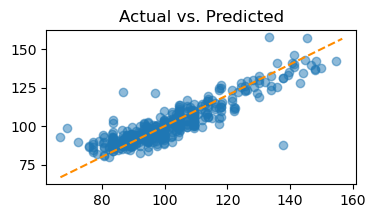

Mean of Residuals 0.00766708562193484
p_value for normality 1.894835321150053e-10
Residuals are not normally distributed and assumption not satisfied


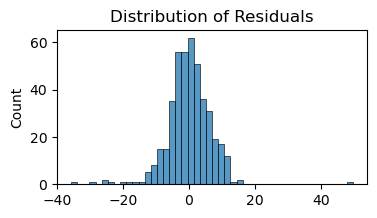

Durbin-Watson: 2.0593299366595215
Little to no autocorrelation and hence Assumption satisfied
p_value:  3.2947872450046476e-57
Error terms are not homoscedastic and hence Assumption not satisfied


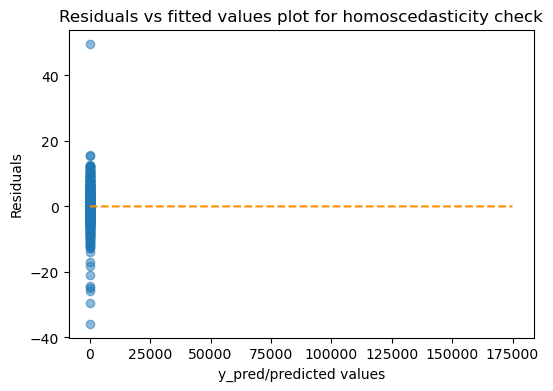

Age_08_04: 51.59451110138639
KM: 25.1691702443925
HP: 251.0689673867394
cc: 217.7173974495721
Doors: 81.00033607337191
Gears: 1815.4708437067593
Quarterly_Tax: 39.477735529595755
Weight: 2297.920908749192

8 cases of possible multicollinearity
4 cases of definite multicollinearity

Assumption not satisfied, hence Consider removing variables with a high Variance Inflation Factor (VIF)


In [37]:
print("Square root transformed model")
model(dataset_sqrt)

Cube root transformed model
MAE: 0.7160933307818625
MSE: 1.0188131219824454
RMSE: 1.0093627306288089
MAPE: 0.03339983160754865
Rsquare: 0.7796283497145997


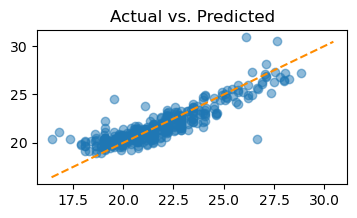

Mean of Residuals 0.0027885297009435984
p_value for normality 2.372936890761526e-10
Residuals are not normally distributed and assumption not satisfied


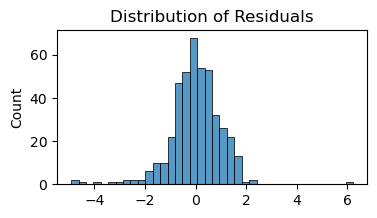

Durbin-Watson: 2.069363047855022
Little to no autocorrelation and hence Assumption satisfied
p_value:  6.454863240453961e-51
Error terms are not homoscedastic and hence Assumption not satisfied


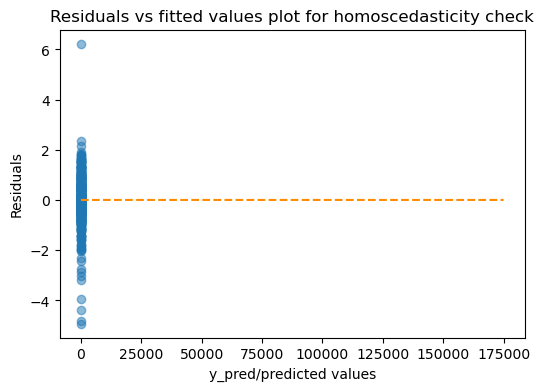

Age_08_04: 105.24867875829565
KM: 50.02774589194331
HP: 547.7897349013552
cc: 644.4813512684765
Doors: 179.46365960921457
Gears: 4130.38891593524
Quarterly_Tax: 83.36878044931987
Weight: 5358.8656961732095

8 cases of possible multicollinearity
6 cases of definite multicollinearity

Assumption not satisfied, hence Consider removing variables with a high Variance Inflation Factor (VIF)


In [38]:
print("Cube root transformed model")
model(dataset_cbrt)

Model without weight and gear because they have high vif value
MAE: 1094.4195818290732
MSE: 2025230.3931486185
RMSE: 1423.1058966741086
MAPE: 0.11084749522285706
Rsquare: 0.8206301553152524


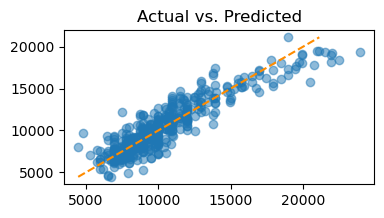

Mean of Residuals -50.98503395144874
p_value for normality 0.02681671139574996
Residuals are not normally distributed and assumption not satisfied


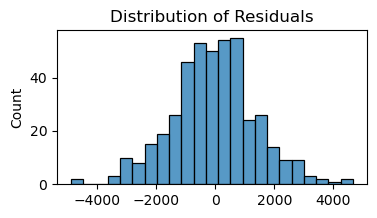

Durbin-Watson: 1.882843650273298
Little to no autocorrelation and hence Assumption satisfied
p_value:  7.098562450250223e-64
Error terms are not homoscedastic and hence Assumption not satisfied


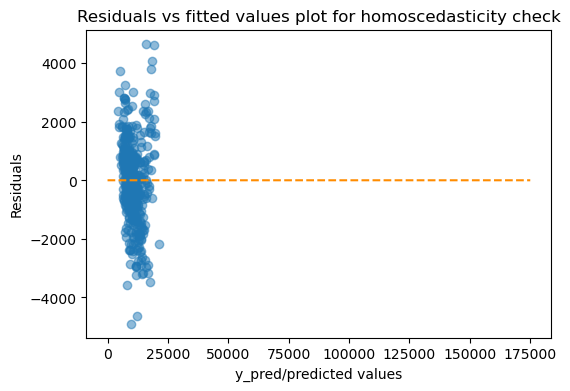

Age_08_04: 13.459894144527102
KM: 7.567643128070318
HP: 25.5157827926114
cc: 16.172176216168992
Doors: 17.557083855621542
Quarterly_Tax: 7.161327983123358

4 cases of possible multicollinearity
0 cases of definite multicollinearity

Assumption possibly satisfied, hence Consider removing variables with a high Variance Inflation Factor (VIF)


In [39]:
print("Model without weight and gear because they have high vif value")
model(dataset_wgt_grs)

Model without weight,gear and because they have high vif value
MAE: 1222.6049714865171
MSE: 4014901.484466588
RMSE: 2003.7219079669185
MAPE: 0.11883672488910545
Rsquare: 0.6444097135172279


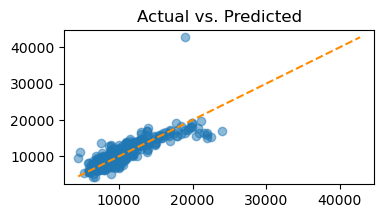

Mean of Residuals -88.04420431197916
p_value for normality 2.5502372083949733e-28
Residuals are not normally distributed and assumption not satisfied


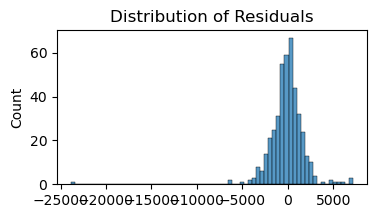

Durbin-Watson: 1.8930904227314438
Little to no autocorrelation and hence Assumption satisfied
p_value:  7.952433932213384e-26
Error terms are not homoscedastic and hence Assumption not satisfied


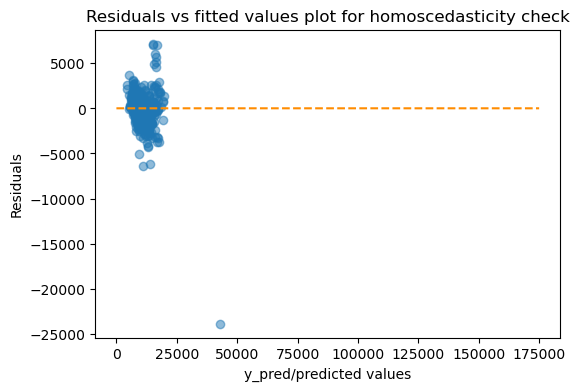

Age_08_04: 11.004996591226549
KM: 7.102055761264338
cc: 13.009825237739628
Doors: 11.969206540073909
Quarterly_Tax: 7.16105077514304

3 cases of possible multicollinearity
0 cases of definite multicollinearity

Assumption possibly satisfied, hence Consider removing variables with a high Variance Inflation Factor (VIF)


In [40]:
print("Model without weight,gear and because they have high vif value")
model(dataset_wgt_grs_hp)

Model without transformation
                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     1051.
Date:                Sat, 18 Mar 2023   Prob (F-statistic):               0.00
Time:                        12:04:34   Log-Likelihood:                -12503.
No. Observations:                1436   AIC:                         2.502e+04
Df Residuals:                    1428   BIC:                         2.506e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -39

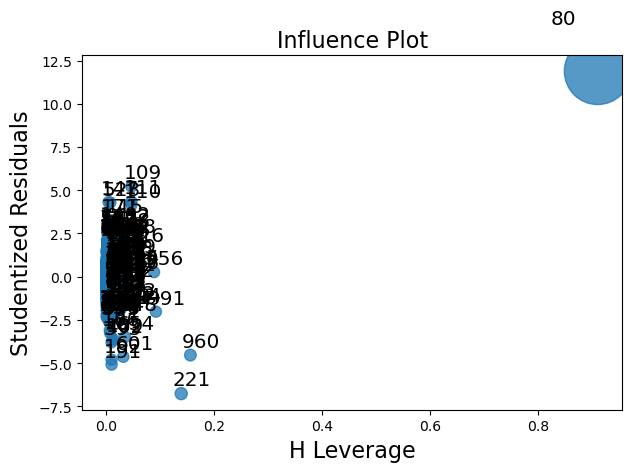

In [41]:
print("Model without transformation")
smf_ols(dataset)     

Square transformed model
                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.717
Model:                            OLS   Adj. R-squared:                  0.716
Method:                 Least Squares   F-statistic:                     517.9
Date:                Sat, 18 Mar 2023   Prob (F-statistic):               0.00
Time:                        12:04:37   Log-Likelihood:                -27619.
No. Observations:                1436   AIC:                         5.525e+04
Df Residuals:                    1428   BIC:                         5.530e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -2.053e

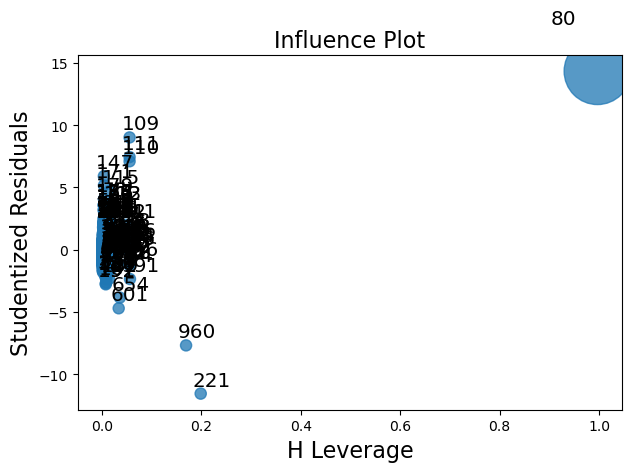

In [42]:
print("Square transformed model")
smf_ols(dataset_sqr)

Square root transformed model
                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     1117.
Date:                Sat, 18 Mar 2023   Prob (F-statistic):               0.00
Time:                        12:04:39   Log-Likelihood:                -4686.2
No. Observations:                1436   AIC:                             9388.
Df Residuals:                    1428   BIC:                             9431.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       

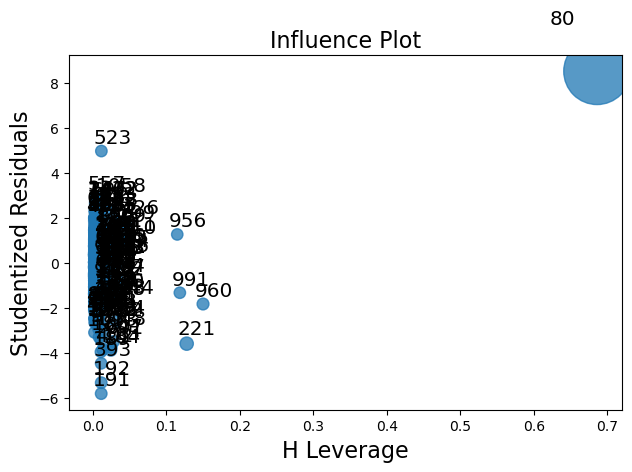

In [43]:
print("Square root transformed model")
smf_ols(dataset_sqrt)

Cube root transformed model
                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     992.6
Date:                Sat, 18 Mar 2023   Prob (F-statistic):               0.00
Time:                        12:04:41   Log-Likelihood:                -1925.2
No. Observations:                1436   AIC:                             3866.
Df Residuals:                    1428   BIC:                             3909.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         

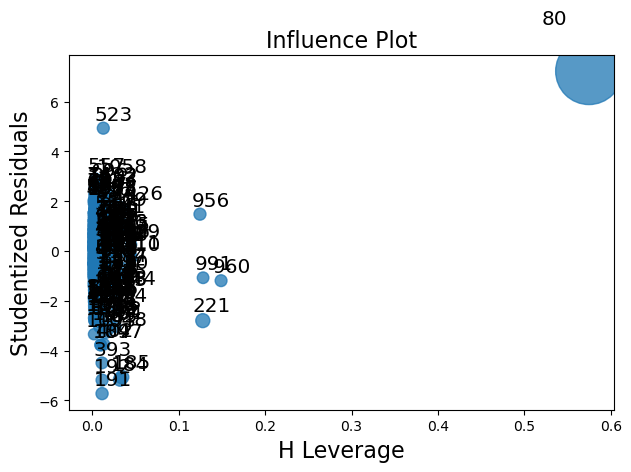

In [44]:
print("Cube root transformed model")
smf_ols(dataset_cbrt)

Model without weight and gear because they have high vif value
                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     1258.
Date:                Sat, 18 Mar 2023   Prob (F-statistic):               0.00
Time:                        12:04:43   Log-Likelihood:                -12596.
No. Observations:                1436   AIC:                         2.520e+04
Df Residuals:                    1430   BIC:                         2.524e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------

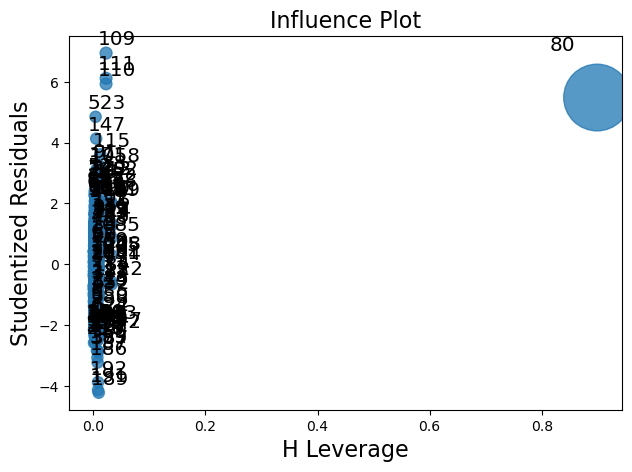

In [45]:
print("Model without weight and gear because they have high vif value")
smf_ols_wgt_grs(dataset_wgt_grs)

## Model without transformation using smf_ols is giving best R square value after model diagnostics by applying cook's distance, hence this model can be used for prediction of price